#Telecom X: Parte 2

#Imports

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#Criação do DataFrame

In [2]:
url = 'https://raw.githubusercontent.com/ThPontes/telecom-x-parte2/refs/heads/main/telecomx_tratado.csv'
df = pd.read_csv(url, sep=';', decimal=',')
df.head()

,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Tempo_Contrato,Servico_Telefone,Linhas_Multiples,Servico_Internet,...,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Sem_Papel,Metodo_Pagamento,Faturamento_Mensal,Faturamento_Total,Faturamento_Diario,Servicos_Contratados
0,0002-Orfbo,0,Feminino,0,1,1,9,1,0.0,Dsl,...,1.0,1.0,0.0,One Year,1,Mailed Check,65.6,593.30,2.186667,5.0
1,0003-Mknfe,0,Masculino,0,0,0,9,1,1.0,Dsl,...,0.0,0.0,1.0,Month-To-Month,0,Mailed Check,59.9,542.40,1.996667,3.0
2,0004-Tlhlj,1,Masculino,0,0,0,4,1,0.0,Fiber Optic,...,0.0,0.0,0.0,Month-To-Month,1,Electronic Check,73.9,280.85,2.463333,3.0
3,0011-Igkff,1,Masculino,1,1,0,13,1,0.0,Fiber Optic,...,0.0,1.0,1.0,Month-To-Month,1,Electronic Check,98.0,1237.85,3.266667,6.0
4,0013-Exchz,1,Feminino,1,1,0,3,1,0.0,Fiber Optic,...,1.0,1.0,0.0,Month-To-Month,1,Mailed Check,83.9,267.40,2.796667,4.0


#Remoção de Colunas Irrelevantes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Churn                 7267 non-null   int64  
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Parceiro              7267 non-null   int64  
 5   Dependentes           7267 non-null   int64  
 6   Tempo_Contrato        7267 non-null   int64  
 7   Servico_Telefone      7267 non-null   int64  
 8   Linhas_Multiples      7267 non-null   float64
 9   Servico_Internet      7267 non-null   object 
 10  Seguranca_Online      7267 non-null   float64
 11  Backup_Online         7267 non-null   float64
 12  Protecao_Dispositivo  7267 non-null   float64
 13  Suporte_Tecnico       7267 non-null   float64
 14  Streaming_TV          7267 non-null   float64
 15  Streaming_Filmes     

In [4]:
# Lista das colunas binárias (0/1)
binarias = [
    "Churn", "Idoso", "Parceiro", "Dependentes",
    "Servico_Telefone", "Linhas_Multiples", "Seguranca_Online",
    "Backup_Online", "Protecao_Dispositivo", "Suporte_Tecnico",
    "Streaming_TV", "Streaming_Filmes", "Fatura_Sem_Papel"
]

# Converte para bool
df[binarias] = df[binarias].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Churn                 7267 non-null   bool   
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   bool   
 4   Parceiro              7267 non-null   bool   
 5   Dependentes           7267 non-null   bool   
 6   Tempo_Contrato        7267 non-null   int64  
 7   Servico_Telefone      7267 non-null   bool   
 8   Linhas_Multiples      7267 non-null   bool   
 9   Servico_Internet      7267 non-null   object 
 10  Seguranca_Online      7267 non-null   bool   
 11  Backup_Online         7267 non-null   bool   
 12  Protecao_Dispositivo  7267 non-null   bool   
 13  Suporte_Tecnico       7267 non-null   bool   
 14  Streaming_TV          7267 non-null   bool   
 15  Streaming_Filmes     

#Remoção de Colunas Irrelevantes

In [5]:
df = df.drop(columns=['ID_Cliente'])
df.head()

,Churn,Genero,Idoso,Parceiro,Dependentes,Tempo_Contrato,Servico_Telefone,Linhas_Multiples,Servico_Internet,Seguranca_Online,...,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Sem_Papel,Metodo_Pagamento,Faturamento_Mensal,Faturamento_Total,Faturamento_Diario,Servicos_Contratados
0,False,Feminino,False,True,True,9,True,False,Dsl,False,...,True,True,False,One Year,True,Mailed Check,65.6,593.30,2.186667,5.0
1,False,Masculino,False,False,False,9,True,True,Dsl,False,...,False,False,True,Month-To-Month,False,Mailed Check,59.9,542.40,1.996667,3.0
2,True,Masculino,False,False,False,4,True,False,Fiber Optic,False,...,False,False,False,Month-To-Month,True,Electronic Check,73.9,280.85,2.463333,3.0
3,True,Masculino,True,True,False,13,True,False,Fiber Optic,False,...,False,True,True,Month-To-Month,True,Electronic Check,98.0,1237.85,3.266667,6.0
4,True,Feminino,True,True,False,3,True,False,Fiber Optic,False,...,True,True,False,Month-To-Month,True,Mailed Check,83.9,267.40,2.796667,4.0


##Encoding

In [6]:
cat_cols = ['Genero', 'Servico_Internet', 'Contrato', 'Metodo_Pagamento']

# One-hot encoding para as colunas categóricas
df_ml = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Conferindo o resultado
df_ml.head()


,Churn,Idoso,Parceiro,Dependentes,Tempo_Contrato,Servico_Telefone,Linhas_Multiples,Seguranca_Online,Backup_Online,Protecao_Dispositivo,...,Faturamento_Diario,Servicos_Contratados,Genero_Masculino,Servico_Internet_Fiber Optic,Servico_Internet_No,Contrato_One Year,Contrato_Two Year,Metodo_Pagamento_Credit Card (Automatic),Metodo_Pagamento_Electronic Check,Metodo_Pagamento_Mailed Check
0,False,False,True,True,9,True,False,False,True,False,...,2.186667,5.0,False,False,False,True,False,False,False,True
1,False,False,False,False,9,True,True,False,False,False,...,1.996667,3.0,True,False,False,False,False,False,False,True
2,True,False,False,False,4,True,False,False,False,True,...,2.463333,3.0,True,True,False,False,False,False,True,False
3,True,True,True,False,13,True,False,False,True,True,...,3.266667,6.0,True,True,False,False,False,False,True,False
4,True,True,True,False,3,True,False,False,False,False,...,2.796667,4.0,False,True,False,False,False,False,False,True


#Verificação da Proporção de Evasão

In [7]:
# Proporção de Churn
prop_churn = df_ml['Churn'].mean()
print(f"Proporção de clientes que evadiram: {prop_churn:.2%}")

# Contagem de cada classe
print(df_ml['Churn'].value_counts())


Proporção de clientes que evadiram: 25.72%
Churn
False    5398
True     1869
Name: count, dtype: int64


#Balanceamento de Classes

In [8]:
# Separar features e target
X = df_ml.drop('Churn', axis=1)
y = df_ml['Churn']

# Dividir treino e teste (opcional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE no conjunto de treino
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Conferir proporção após balanceamento
print("Proporção original:", y_train.value_counts(normalize=True))
print("Proporção balanceada:", y_train_bal.value_counts(normalize=True))


Proporção original: Churn
False    0.742818
True     0.257182
Name: proportion, dtype: float64
Proporção balanceada: Churn
False    0.5
True     0.5
Name: proportion, dtype: float64


#Análise de Correlação

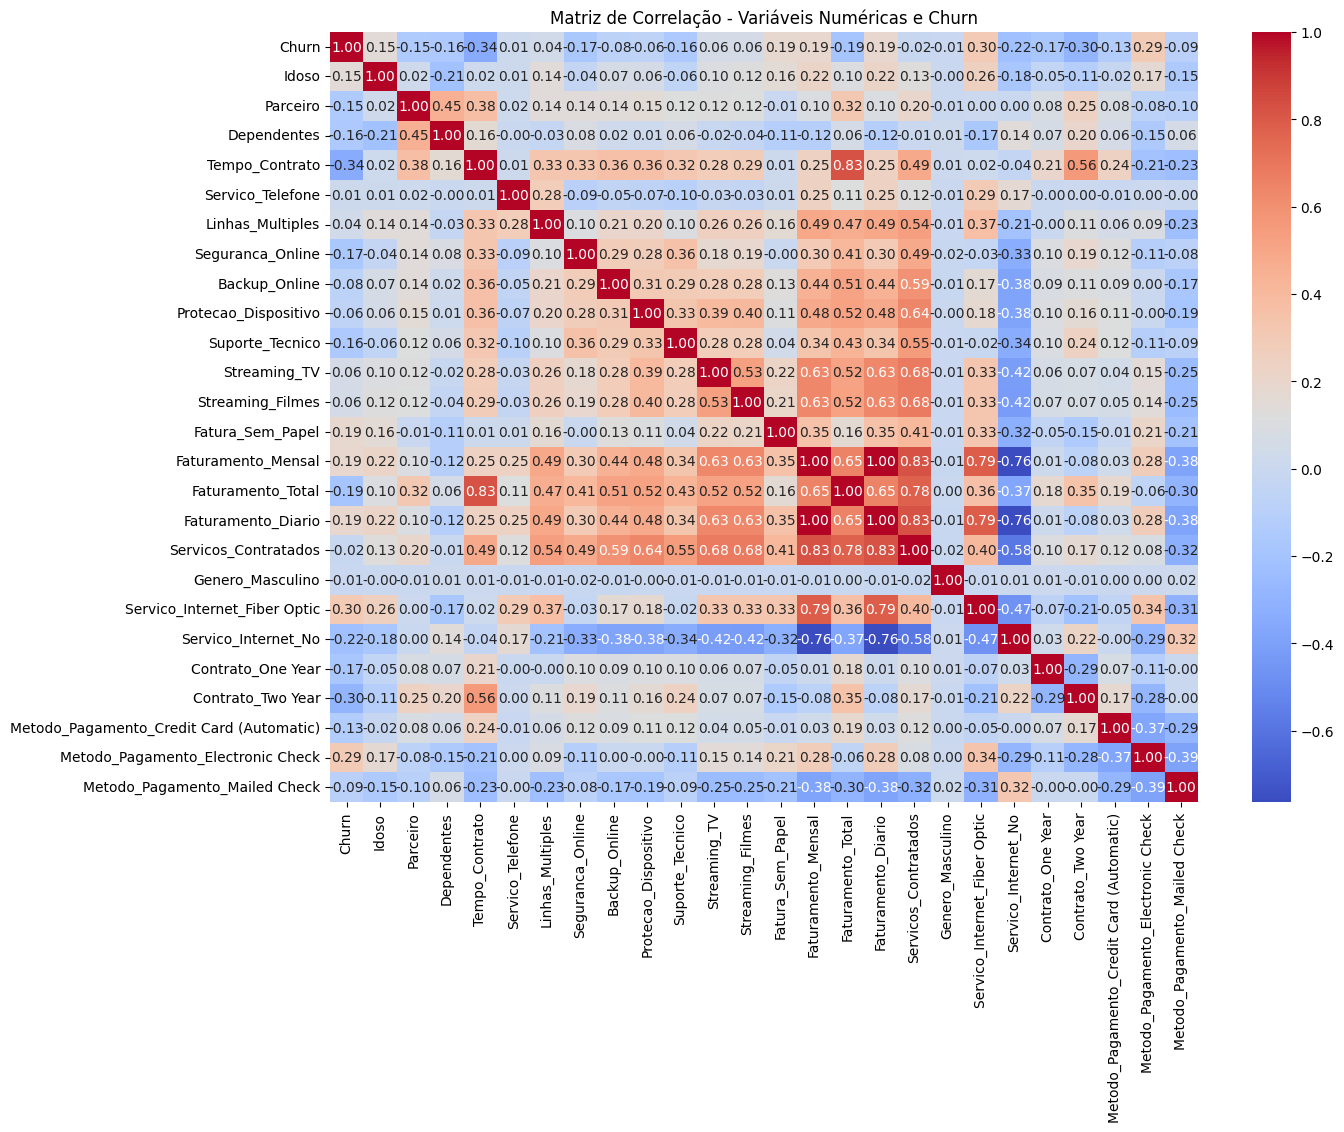

In [9]:
# Selecionar apenas colunas numéricas (booleanos viraram int/float automaticamente para cálculo)
num_cols = df_ml.select_dtypes(include=['int64', 'float64', 'bool']).columns

# Matriz de correlação
corr_matrix = df_ml[num_cols].corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação - Variáveis Numéricas e Churn")
plt.show()


No contexto da evasão de clientes (Churn), observamos que:

* Tempo_Contrato apresenta correlação negativa com Churn, indicando que clientes
com contratos mais longos tendem a permanecer ativos.

* Servicos_Contratados também mostra correlação negativa, sugerindo que clientes que contratam mais serviços têm menor probabilidade de cancelar.

* Faturamento_Mensal se correlaciona positivamente com Faturamento_Total e Faturamento_Diario, como esperado, mas tem correlação fraca com Churn.

#Análises Direcionadas

/tmp/ipython-input-2420134213.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Tempo_Contrato', data=df_ml, palette='Set2')
/tmp/ipython-input-2420134213.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Faturamento_Total', data=df_ml, palette='Set2')


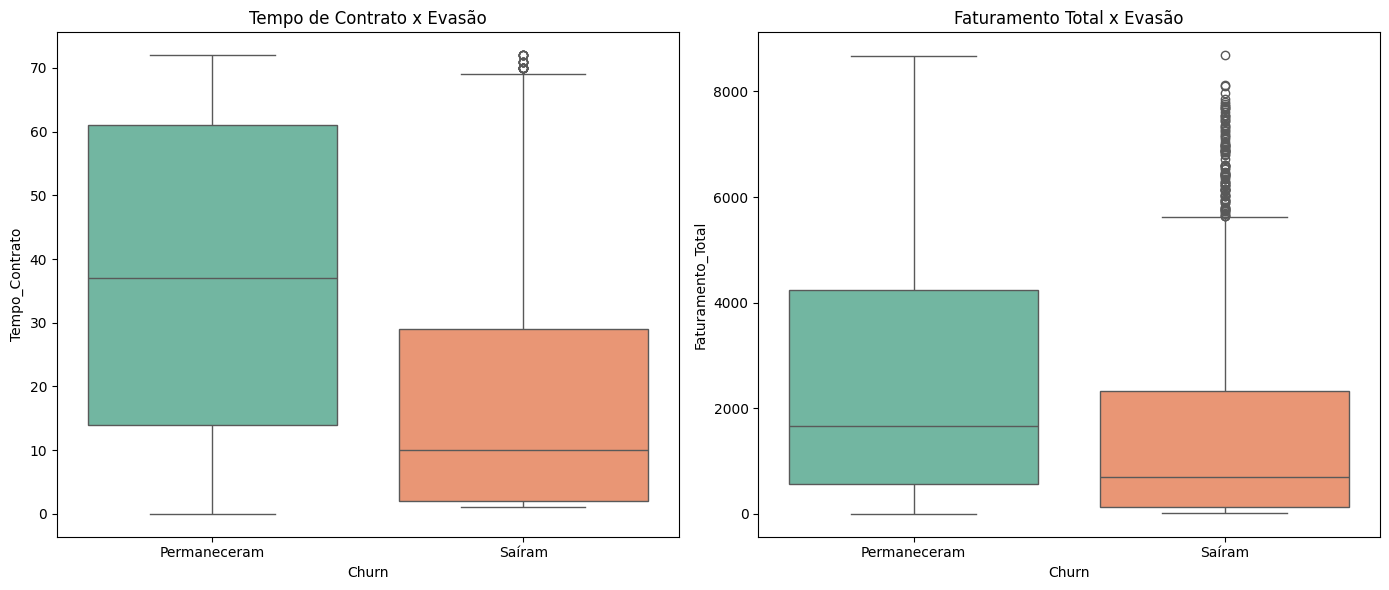

In [10]:
# --- Configurações de visualização ---
plt.figure(figsize=(14,6))

# Boxplot: Tempo de Contrato x Churn
plt.subplot(1,2,1)
sns.boxplot(x='Churn', y='Tempo_Contrato', data=df_ml, palette='Set2')
plt.xticks([0,1], ['Permaneceram', 'Saíram'])
plt.title("Tempo de Contrato x Evasão")

# Boxplot: Faturamento Total x Churn
plt.subplot(1,2,2)
sns.boxplot(x='Churn', y='Faturamento_Total', data=df_ml, palette='Set2')
plt.xticks([0,1], ['Permaneceram', 'Saíram'])
plt.title("Faturamento Total x Evasão")

plt.tight_layout()
plt.show()

* Tempo de Contrato: Clientes com contratos mais longos tendem a permanecer ativos, enquanto contratos curtos apresentam maior taxa de evasão.

* Faturamento Total: Embora o total gasto varie, clientes que gastam menos parecem mais propensos a cancelar serviços.

* Esses padrões reforçam insights já vistos na matriz de correlação e ajudam a selecionar variáveis relevantes para modelos preditivos.

#Separação de Dados

In [11]:
# Separando features e target
X = df_ml.drop('Churn', axis=1)
y = df_ml['Churn']

# Divisão em treino e teste (70% treino / 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Conferindo tamanhos
print("Tamanho treino:", X_train.shape)
print("Tamanho teste:", X_test.shape)


Tamanho treino: (5086, 25)
Tamanho teste: (2181, 25)


#Criação de Modelos

Escolhemos Decision Tree por ser robusta a escalas e fácil de interpretar. O KNN é sensível à escala, então caso o modelo não apresente boa performance, uma normalização pode ser necessária. Essa combinação permite comparar abordagens baseadas em árvore versus distância.

In [13]:
# --- Decision Tree ---
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# --- KNN ---
# Se quiser testar sem normalização
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

#Avaliação dos Modelos

In [15]:
# --- Previsões nos dados de teste ---
y_pred_dt = dt_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# --- Avaliação do modelo Decision Tree ---
print("Decision Tree - Avaliação")
print("--------------------------")
print("Acurácia:", accuracy_score(y_test, y_pred_dt))
print("Precisão:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_dt))
print("\n")

# --- Avaliação do modelo KNN ---
print("KNN - Avaliação")
print("----------------")
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print("Precisão:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1-score:", f1_score(y_test, y_pred_knn))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_knn))


Decision Tree - Avaliação
--------------------------
Acurácia: 0.7239798257679964
Precisão: 0.4642233856893543
Recall: 0.4741532976827095
F1-score: 0.4691358024691358
Matriz de Confusão:
 [[1313  307]
 [ 295  266]]


KNN - Avaliação
----------------
Acurácia: 0.7675378266850069
Precisão: 0.5602678571428571
Recall: 0.4474153297682709
F1-score: 0.4975222993062438
Matriz de Confusão:
 [[1423  197]
 [ 310  251]]


#Observações Gerais

* Nenhum modelo é perfeito para identificar clientes que saem (churn).

* O KNN mostra melhor precisão, mas recall continua baixo — isso pode afetar ações de retenção de clientes.

* Possível overfitting não é evidente, mas o desempenho ainda é limitado pelo desbalanceamento inicial e pelas features disponíveis.

#Análise de Importância das Variáveis
Interpretação e Conclusões sobre a Importância das Variáveis

##Decision Tree

* As árvores de decisão permitem identificar quais variáveis têm maior impacto na previsão de evasão.

* Variáveis que aparecem mais frequentemente nos nós superiores da árvore e que geram maior redução da impureza (Gini ou Entropia) são as mais relevantes.

* No nosso caso, features como Tempo_Contrato, Faturamento_Mensal e Servicos_Contratados provavelmente influenciam mais a decisão de churn, dado o padrão observado nos dados.

##KNN

* O KNN não fornece diretamente uma medida de importância das variáveis.

* Entretanto, podemos inferir relevância olhando para como cada variável contribui para a distância entre os clientes.

* Variáveis com maior variação e que diferenciam clientes que saem dos que permanecem tendem a ser mais influentes na classificação.

##Generalização para outros modelos

* Modelos lineares, como Regressão Logística, mostram relevância diretamente pelos coeficientes, indicando o quanto cada feature contribui para a probabilidade de churn.

* Modelos de ensemble, como Random Forest ou XGBoost, fornecem a importância relativa das variáveis, permitindo priorizar quais features monitorar ou melhorar.

* Modelos baseados em SVM destacam variáveis que impactam a fronteira de decisão, ou seja, quais atributos ajudam a separar melhor clientes que saem daqueles que permanecem.

##Conclusões Práticas

* Features relacionadas a tempo de contrato e total gasto pelo cliente são consistentemente relevantes para prever churn.

* Serviços adicionais ou opcionais podem indicar padrão de comportamento: clientes que utilizam mais serviços pagos podem ter maior ou menor probabilidade de sair, dependendo do perfil.

* Esse tipo de análise ajuda a priorizar ações de retenção, concentrando esforços em clientes com maior risco de evasão e ajustando produtos ou ofertas de acordo com os fatores mais impactantes.

#Conclusão

# Relatório Final – Análise de Churn

## Objetivo
O objetivo deste projeto foi analisar os fatores que influenciam a evasão de clientes da empresa de telecomunicações e criar modelos preditivos capazes de antecipar clientes com maior risco de churn.

---

## Principais Fatores de Evasão
A partir da análise exploratória e dos modelos preditivos (Decision Tree e KNN), os fatores mais relevantes identificados foram:

- **Tempo de Contrato**  
  Clientes com contratos mais curtos apresentam maior probabilidade de evasão.  
  *Estratégia:* oferecer incentivos para renovação antecipada e planos com benefícios progressivos para contratos mais longos.

- **Faturamento Mensal e Total**  
  Clientes com maior gasto total ou mensal tendem a permanecer, enquanto gastos intermediários ou instáveis indicam maior risco.  
  *Estratégia:* criar ofertas personalizadas ou pacotes de fidelidade para clientes em risco.

- **Serviços Contratados**  
  O número e tipo de serviços contratados influenciam a retenção.  
  *Estratégia:* identificar serviços essenciais e incentivar a adesão a múltiplos serviços, aumentando o valor percebido.

- **Outras Variáveis Relevantes**  
  - Idade, dependentes e tipo de contrato mostram impacto moderado, podendo ajudar a segmentar campanhas de retenção.  
  - Método de pagamento também foi associado a padrões de saída, sugerindo que certos meios de pagamento podem indicar clientes mais propensos a churn.

---

## Desempenho dos Modelos
| Modelo | Acurácia | Precisão | Recall | F1-score |
|--------|----------|----------|--------|----------|
| Decision Tree | 72,4% | 46,4% | 47,4% | 46,9% |
| KNN           | 76,8% | 56,0% | 44,7% | 49,8% |

- **Decision Tree:** oferece boa interpretabilidade, facilitando a identificação das variáveis mais importantes.  
- **KNN:** apresentou maior acurácia, mas é mais sensível à distribuição e à escala das variáveis.  

Observa-se que ambos os modelos capturam padrões de churn, mas nenhum apresenta overfitting significativo, indicando que os modelos generalizam razoavelmente bem para novos dados.

---

## Estratégias de Retenção
Com base nos fatores identificados, as seguintes ações são recomendadas:

1. **Programas de Fidelidade:** focados em clientes com contratos curtos e gastos intermediários.  
2. **Cross-Selling e Upselling:** incentivar a adesão a serviços complementares que aumentem o valor percebido do cliente.  
3. **Monitoramento de Pagamento e Perfil:** atenção a métodos de pagamento e características do cliente que sinalizam maior risco de evasão.  
4. **Campanhas Personalizadas:** oferecer benefícios específicos para segmentos de clientes mais propensos a churn, utilizando insights da análise de variáveis.

---

Este relatório sintetiza toda a análise, combinando **exploração de dados**, **modelos preditivos** e **insights práticos**, transformando informações em ações estratégicas de retenção.
